## Import Packages

In [1]:
# Data Handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Model and Model Selection
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Plotting
import seaborn as sns

## Working Directory

In [2]:
#'C:\Users\rodri\Documents\School\Spring_2021\SeniorDesign\Git\ChevronTeamSpring2021\Our Program\Data Compiling - Warning Labels'
#../data_folder/data.csv
import os
print(os.getcwd())

C:\Users\rodri\Documents\School\Spring_2021\SeniorDesign\Git\ChevronTeamSpring2021\Our Program\DataCompiling_WarningLabels


We need to try to not put spaces on paths

## Import Data

In [10]:
data = pd.read_excel('Polished_Shit.xlsx')
data.head()

,Unnamed: 0,Time,Inlet Flowrate,Inlet Pressure,Outlet Pressure,Pump Driver Vibration,Pump Vibration,Time On,Status,Condition,...,Valve_Alignment Failure,Broken_Impeller Failure,Leaking_Valve Failure,Cracked_Seal Failure,Motor_Distorted TT Failure,Broken_Valve TT Failure,Valve_Alignment TT Failure,Broken_Impeller TT Failure,Leaking_Valve TT Failure,Cracked_Seal TT Failure
0,0,1519138890,2038.945312,44.089844,5589.695313,0.072129,0.022539,0,On,Normal,...,0.0,0.0,0.0,0.0,25234680.0,23509440.0,12296280.0,23340240.0,25016280.0,22929120.0
1,1,1519139010,2040.156250,44.150391,5585.048829,0.073216,0.022109,120,On,Normal,...,0.0,0.0,0.0,0.0,25234560.0,23509320.0,12296160.0,23340120.0,25016160.0,22929000.0
2,2,1519139130,2040.937500,44.190104,5592.539063,0.074336,0.023398,240,On,Normal,...,0.0,0.0,0.0,0.0,25234440.0,23509200.0,12296040.0,23340000.0,25016040.0,22928880.0
3,3,1519139250,2042.578125,44.185547,5595.966797,0.074385,0.022520,360,On,Normal,...,0.0,0.0,0.0,0.0,25234320.0,23509080.0,12295920.0,23339880.0,25015920.0,22928760.0
4,4,1519139370,2042.395833,44.158203,5592.539063,0.073105,0.022721,480,On,Normal,...,0.0,0.0,0.0,0.0,25234200.0,23508960.0,12295800.0,23339760.0,25015800.0,22928640.0


In [11]:
data = data.drop(columns = ['Unnamed: 0', 'Time', 'Valve_Alignment Failure', 'Broken_Impeller Failure', 'Leaking_Valve Failure', 'Cracked_Seal Failure', 'Motor_Distorted TT Failure', 'Broken_Valve TT Failure', 'Valve_Alignment TT Failure', 'Broken_Impeller TT Failure','Leaking_Valve TT Failure','Status',  'Cracked_Seal TT Failure' , 'Motor_Distorted Failure', 'Broken_Valve Failure', 'Time On'])
data.head()

,Inlet Flowrate,Inlet Pressure,Outlet Pressure,Pump Driver Vibration,Pump Vibration,Condition
0,2038.945312,44.089844,5589.695313,0.072129,0.022539,Normal
1,2040.156250,44.150391,5585.048829,0.073216,0.022109,Normal
2,2040.937500,44.190104,5592.539063,0.074336,0.023398,Normal
3,2042.578125,44.185547,5595.966797,0.074385,0.022520,Normal
4,2042.395833,44.158203,5592.539063,0.073105,0.022721,Normal


In [12]:
data.describe()

,Inlet Flowrate,Inlet Pressure,Outlet Pressure,Pump Driver Vibration,Pump Vibration
count,300214.000000,300214.000000,300214.000000,300214.000000,300214.000000
mean,1859.113381,42.056855,6362.449128,0.096950,0.028913
std,73.777179,4.129673,1339.631766,0.035193,0.007508
min,1082.187500,-1.210938,-2.539062,0.020195,-0.001406
25%,1805.625000,40.970703,6196.835938,0.070469,0.025078
50%,1859.843750,42.109375,6721.914063,0.087500,0.027852
75%,1909.218750,45.695312,7216.523438,0.117188,0.030781
max,2371.875000,51.734375,8663.281250,0.345391,0.097617


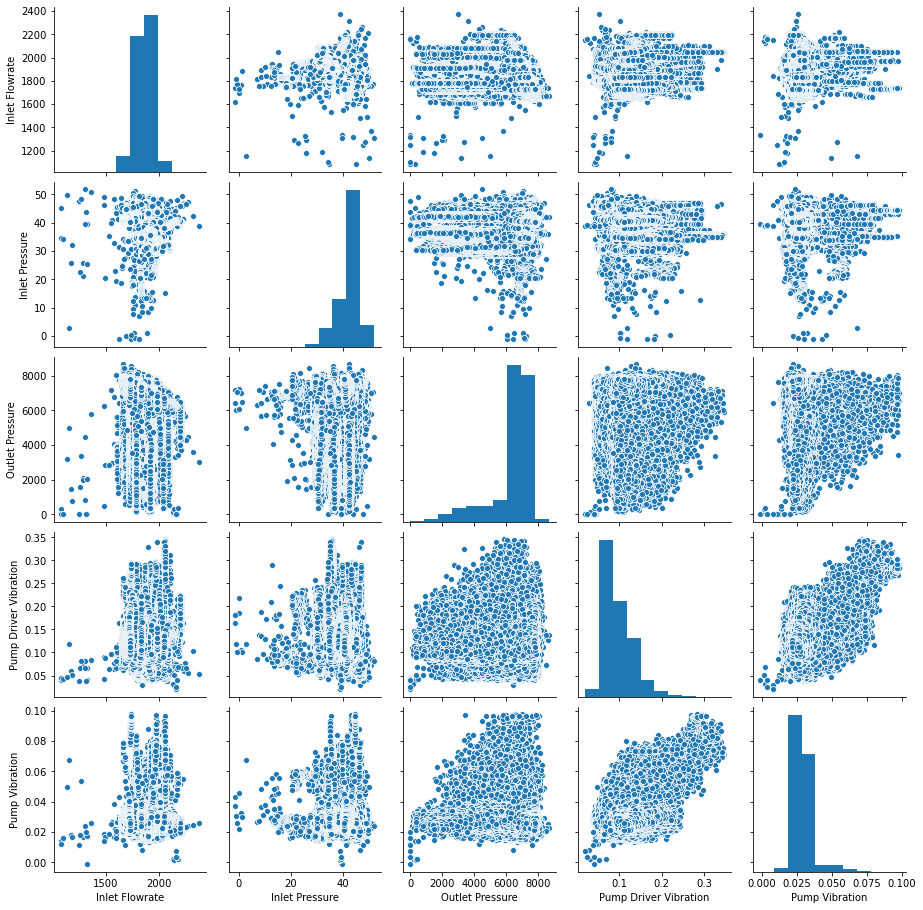

In [13]:
sns.pairplot(data)

What could be interesting is we can see what is correlated with vibration and see what drives that since that drives failure

## Split the Data

In [14]:
y = data['Condition']
X = data.drop(columns = ['Condition'])
X.head()

,Inlet Flowrate,Inlet Pressure,Outlet Pressure,Pump Driver Vibration,Pump Vibration
0,2038.945312,44.089844,5589.695313,0.072129,0.022539
1,2040.156250,44.150391,5585.048829,0.073216,0.022109
2,2040.937500,44.190104,5592.539063,0.074336,0.023398
3,2042.578125,44.185547,5595.966797,0.074385,0.022520
4,2042.395833,44.158203,5592.539063,0.073105,0.022721


## Data Scaling and Model Building

In [15]:
scaler = StandardScaler()
model_supportVector = SVC(   C=1,
                          
                             class_weight={  
                                              'Broken_Impeller':25, 
                                              'Broken_Valve':25, 
                                              'Cracked_Seal':25, 
                                              'Leaking_Valve':25, 
                                              'Motor_Distorted':25, 
                                              'Normal':1, 
                                              'Valve_Alignment':25}, 
                          
                               kernel = "rbf")

pipe = Pipeline(steps=[('scaler', scaler), ('svc', model_supportVector)])

## Prediction

In [ ]:
predict = cross_val_predict(pipe, X, y, cv=10)

In [1]:
print(confusion_matrix(y, predict))
print(classification_report(y, predict))

NameError: name 'confusion_matrix' is not defined

In [ ]:
# Append to the dataFrame
data['Prediction']  = predict

# Save to an Excel File 
data.to_excel("Polished_Shit.xlsx")